# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
#Seu código de importação aqui

df = pd.read_csv('CHURN_PART2.csv')
df.head(10)

,customerID,genero,Idoso,Casado,Dependents,tempo_cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,pagamento_mensal,total_pago,churn
0,7590-VHVEG,Female,0,Yes,No,1,0,DSL,No,No,No,Month-to-month,Electronic check,29.850000,29.85,0
1,5575-GNVDE,Male,0,No,No,34,1,DSL,Yes,No,No,One year,Mailed check,56.950000,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,1,DSL,Yes,No,No,Month-to-month,Mailed check,53.850000,108.15,1
3,7795-CFOCW,Male,0,No,No,45,0,DSL,Yes,Yes,No,One year,Bank transfer (automatic),65.607563,1840.75,0
4,8191-XWSZG,F,0,No,No,52,1,No,No internet service,No internet service,No internet service,One year,Mailed check,65.607563,1022.95,0
5,9959-WOFKT,Male,0,No,Yes,71,1,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),65.607563,7382.25,0
6,4190-MFLUW,F,0,Yes,Yes,10,1,DSL,No,Yes,No,Month-to-month,Credit card (automatic),65.607563,528.35,1
7,4183-MYFRB,F,0,No,No,21,1,Fiber optic,No,No,No,Month-to-month,Electronic check,65.607563,1862.90,0
8,8779-QRDMV,Male,1,No,No,1,0,DSL,No,No,No,Month-to-month,Electronic check,65.607563,39.65,1
9,1680-VDCWW,Male,0,Yes,No,12,1,No,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),65.607563,202.25,0


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [3]:
df.describe()

,Idoso,tempo_cliente,PhoneService,pagamento_mensal,total_pago,churn
count,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,32.352090,0.369775,65.607563,2290.087178,0.260048
std,0.368135,24.636885,0.482841,27.984700,2264.585643,0.438749
min,0.000000,0.000000,0.000000,18.400000,18.800000,0.000000
25%,0.000000,8.000000,0.000000,45.400000,402.337500,0.000000
50%,0.000000,29.000000,0.000000,65.607563,1402.900000,0.000000
75%,0.000000,56.000000,1.000000,87.712500,3867.162500,1.000000
max,1.000000,72.000000,1.000000,118.650000,8564.750000,1.000000


In [4]:
df.dtypes

,0
customerID,object
genero,object
Idoso,int64
Casado,object
Dependents,object
tempo_cliente,int64
PhoneService,int64
Servico_Internet,object
Servico_Seguranca,object
Suporte_Tecnico,object


In [5]:
df.isnull().sum()

,0
customerID,0
genero,0
Idoso,0
Casado,0
Dependents,0
tempo_cliente,0
PhoneService,0
Servico_Internet,0
Servico_Seguranca,0
Suporte_Tecnico,0


B: Já é possivel analisar Outliers nas variaveis acima, principalmente no 'Total_pago' onde a média é bem diferente dos 50%.

In [6]:
# c
#verificando quantidade de linhas com o dado igual a 0
(df['Idoso'] == 0).sum()

np.int64(2086)

In [7]:
(df['Idoso'] == 0).mean() * 100

np.float64(83.84244372990354)

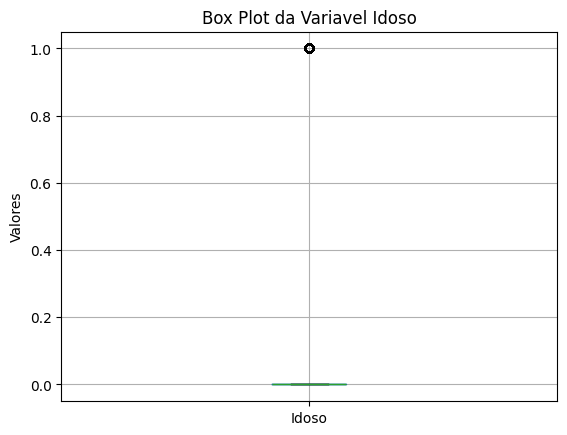

In [8]:
df.boxplot(column='Idoso')
plt.title('Box Plot da Variavel Idoso')
plt.ylabel('Valores')
plt.show()

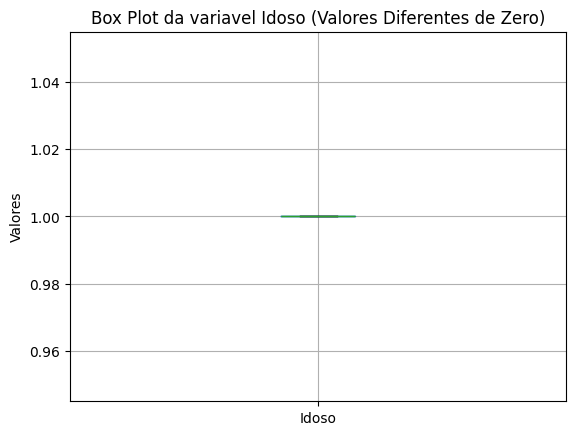

In [9]:
#nesse trecho do nosso código iremos selecionar os valores da coluna balanco que são diferentes de 0
df_nao_zero = df[df['Idoso'] != 0]
df_nao_zero.boxplot(column='Idoso')
plt.title('Box Plot da variavel Idoso (Valores Diferentes de Zero)')
plt.ylabel('Valores')
plt.show()

Notamos que temos um valor fora da normalidade dos dados, mas quando anulamos o 0 os dados ficam balanceados.

In [10]:
(df['tempo_cliente'] == 0).sum()

np.int64(5)

In [11]:
(df['tempo_cliente'] == 0).mean() * 100

np.float64(0.20096463022508038)

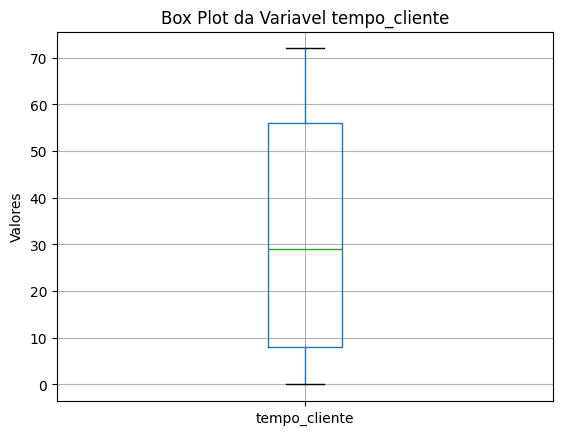

In [12]:
df.boxplot(column='tempo_cliente')
plt.title('Box Plot da Variavel tempo_cliente')
plt.ylabel('Valores')
plt.show()

Notem como o boxplot tem um comportamento esperado, existe proporcionalidade entre a distribuição dos dados, sem presença de outliers.

In [13]:
(df['PhoneService'] == 0).sum()

np.int64(1568)

In [14]:
(df['PhoneService'] == 0).mean() * 100

np.float64(63.022508038585215)

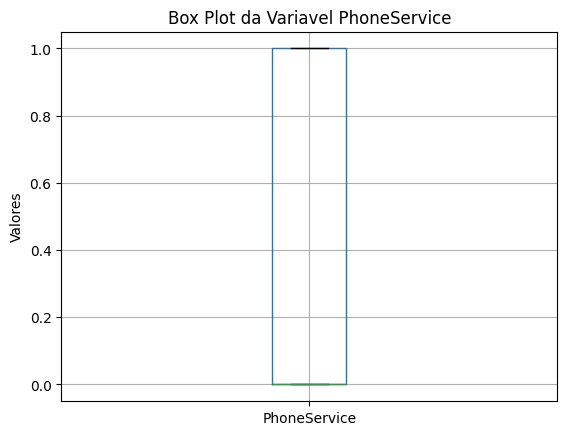

In [15]:
df.boxplot(column='PhoneService')
plt.title('Box Plot da Variavel PhoneService')
plt.ylabel('Valores')
plt.show()

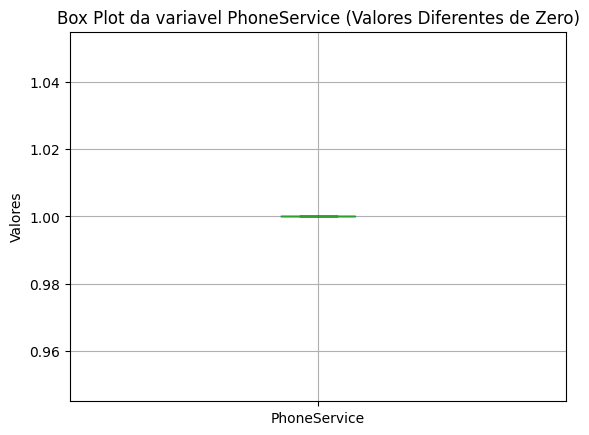

In [16]:
#nesse trecho do nosso código iremos selecionar os valores da coluna balanco que são diferentes de 0
df_nao_zero = df[df['PhoneService'] != 0]
df_nao_zero.boxplot(column='PhoneService')
plt.title('Box Plot da variavel PhoneService (Valores Diferentes de Zero)')
plt.ylabel('Valores')
plt.show()

Notamos que não temos presença de valores fora da normalidade dos dados.

In [17]:
(df['total_pago'] == 0).sum()

np.int64(0)

In [18]:
(df['total_pago'] == 0).mean() * 100

np.float64(0.0)

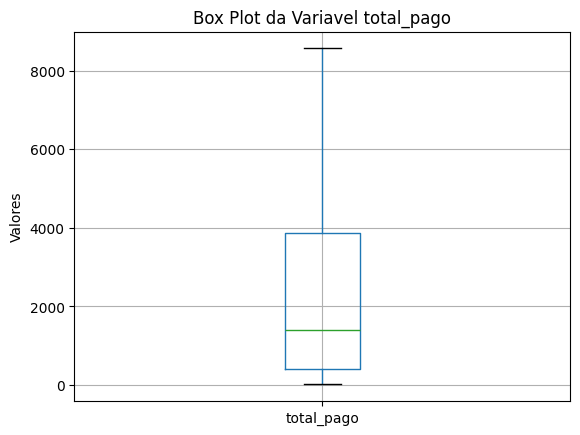

In [19]:
df.boxplot(column='total_pago')
plt.title('Box Plot da Variavel total_pago')
plt.ylabel('Valores')
plt.show()

Notem como o boxplot tem um comportamento indiferente, existe proporcionalidade entre a distribuição dos dados, e existe um valor acima da distribuição dos dados, que é a presença de Outliers.

In [20]:
(df['pagamento_mensal']).sum()

np.float64(163231.61728735632)

In [21]:
(df['pagamento_mensal'] == 0).mean() * 100

np.float64(0.0)

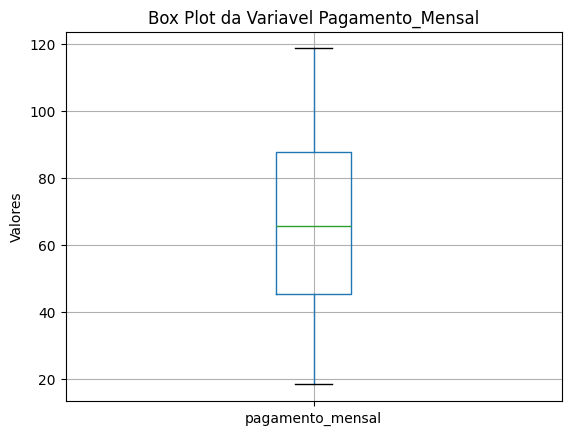

In [22]:
df.boxplot(column='pagamento_mensal')
plt.title('Box Plot da Variavel Pagamento_Mensal')
plt.ylabel('Valores')
plt.show()

Notem como o boxplot tem um comportamento esperado, existe proporcionalidade entre a distribuição dos dados, sem presença de outliers.

Text(0, 0.5, 'Frequência')

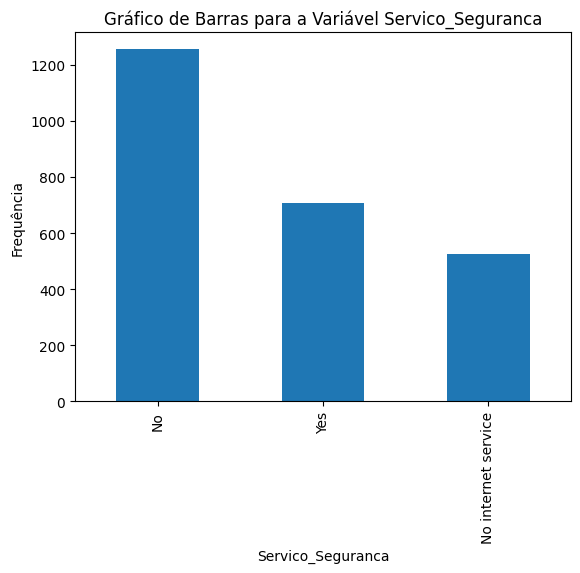

In [23]:
# Contagem dos valores da coluna de Genero
contagem_seguranca = df['Servico_Seguranca'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_seguranca = (contagem_seguranca / contagem_seguranca.sum()) * 100
ax = contagem_seguranca.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Servico_Seguranca')
plt.xlabel('Servico_Seguranca')
plt.ylabel('Frequência')

In [24]:
# Contando as ocorrências
contagem_seguranca = df['Servico_Seguranca'].value_counts()

# Calculando a porcentagem
(contagem_seguranca / contagem_seguranca.sum()) * 100

,count
Servico_Seguranca,
No,50.401929
Yes,28.416399
No internet service,21.181672


Pode se analisar que 50% dos clientes não tem um serviço de segurança e a outra metade está distribuida com clientes que nem possuem serviço de internet.

Bom insight. Pode gerar estratégias de propaganda, para oferecer serviço de internet e segurança ao cliente.

Text(0, 0.5, 'Frequência')

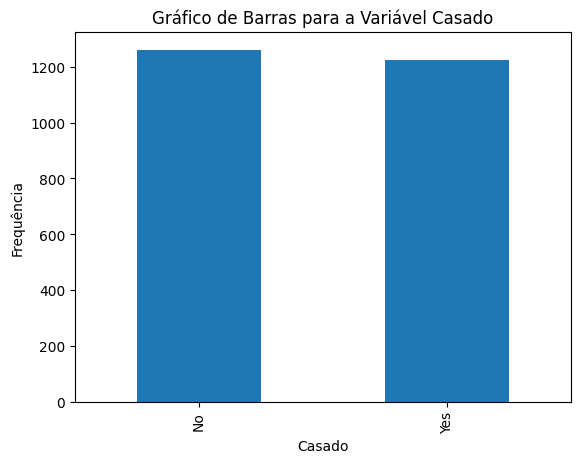

In [25]:
# contagem dos valores da coluna de Casado
contagem_casado = df['Casado'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_casado = (contagem_casado / contagem_casado.sum()) * 100
ax = contagem_casado.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Casado')
plt.xlabel('Casado')
plt.ylabel('Frequência')

In [26]:
# contando as ocorrencias
contagem_casado = df['Casado'].value_counts()

# Calculando a porcentagem
(contagem_casado / contagem_casado.sum()) * 100

,count
Casado,
No,50.723473
Yes,49.276527


Na variável 'Casado' notamos um balanceamento entre as duas classes. Onde pode ser bom para o aprendizado do modelo em relação ao 'churn'.

Text(0, 0.5, 'Frequência')

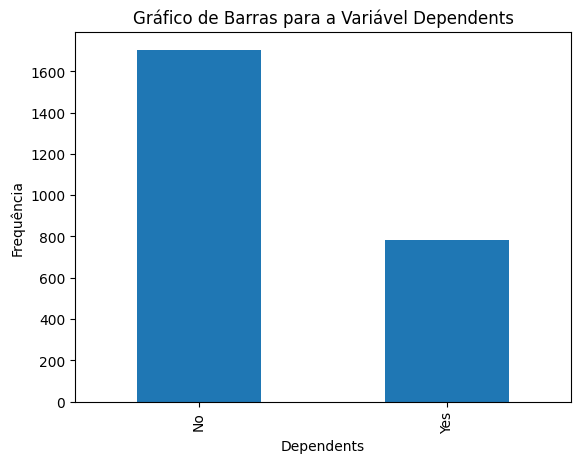

In [27]:
# contagem dos valores da coluna de Dependents
contagem_dependents = df['Dependents'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_dependents = (contagem_dependents / contagem_dependents.sum()) * 100
ax = contagem_dependents.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Dependents')
plt.xlabel('Dependents')
plt.ylabel('Frequência')

In [28]:
# contando as ocorrencias
contagem_dependents = df['Dependents'].value_counts()

# Calculando a porcentagem
(contagem_dependents / contagem_dependents.sum()) * 100

,count
Dependents,
No,68.528939
Yes,31.471061


Na variável 'Dependents' notamos um desbalanceamento entre as duas classes. Onde 70% dos dados não possuem dependentes e isso pode tendenciar mais em direção a essa classe em relação ao 'churn'.

Bom insght para futuras estratégias.

Text(0, 0.5, 'Frequência')

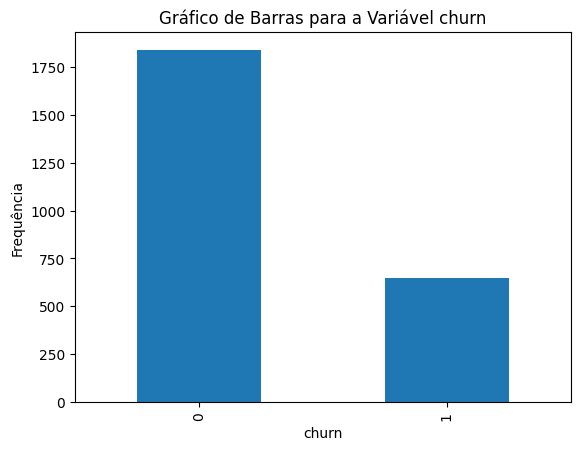

In [29]:
# contagem dos valores da coluna de churn
contagem_churn = df['churn'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_churn = (contagem_churn / contagem_churn.sum()) * 100
ax = contagem_churn.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável churn')
plt.xlabel('churn')
plt.ylabel('Frequência')

In [30]:
# contando as ocorrencias
contagem_churn = df['churn'].value_counts()

# Calculando a porcentagem
(contagem_churn / contagem_churn.sum()) * 100

,count
churn,
0,73.995177
1,26.004823


Identificamos que essa Variavel principal 'churn' tem um desbalanceamento. Onde a grande maioria são clientes que não deram 'churn'.



/tmp/ipython-input-31-1745929954.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


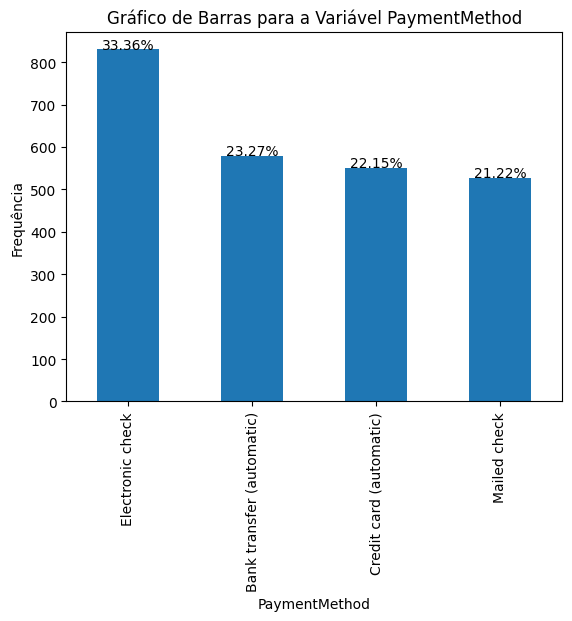

In [31]:
# Calculando as porcentagens
contagem = df['PaymentMethod'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100


ax = contagem.plot(kind='bar')

# Adicionando pora procentagem nas barras
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Frequência')

plt.show()

Pode se avaliar que a variavel metodo de pagamento tem um balanceamento normal entre os dados.

/tmp/ipython-input-32-3402813760.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


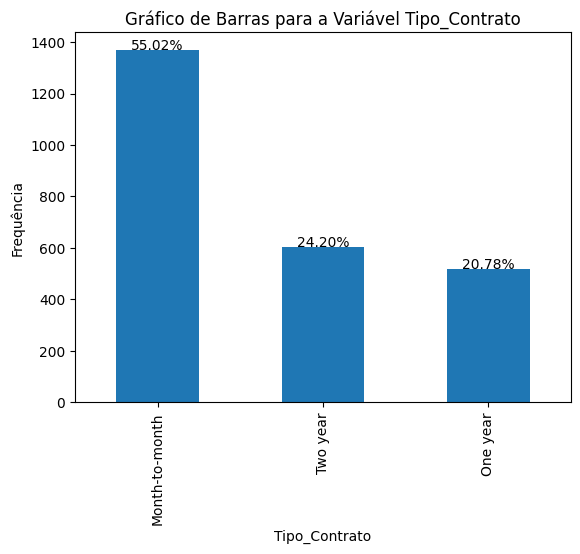

In [32]:
# Calculando as porcentagens
contagem = df['Tipo_Contrato'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

# Adicionando pora procentagem nas barras
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Tipo_Contrato')
plt.xlabel('Tipo_Contrato')
plt.ylabel('Frequência')

plt.show()

Pode se avaliar que 50% dos clientes realizam pagamento mês a mês. Otimo Insght para futuras estratégias promocionais em planos anuais.

/tmp/ipython-input-33-1647253856.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


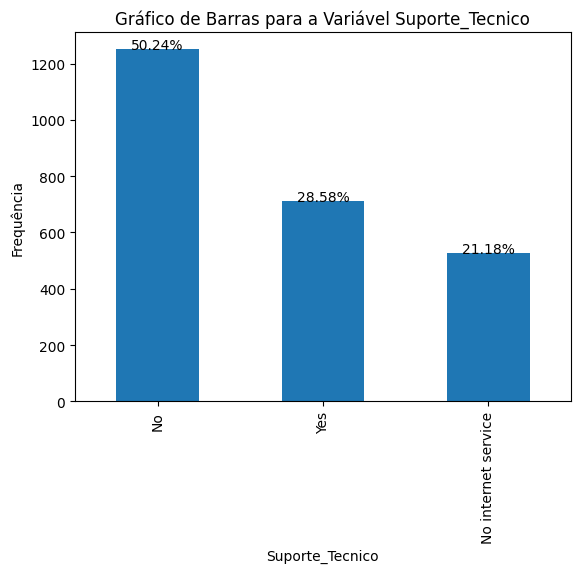

In [33]:
# Calculando as porcentagens
contagem = df['Suporte_Tecnico'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

# Adicionando pora procentagem nas barras
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Suporte_Tecnico')
plt.xlabel('Suporte_Tecnico')
plt.ylabel('Frequência')

plt.show()

Pode se avaliar que 50% dos clientes não possuem um suporte tecnico. Otimo Insght para futuras estratégias.

/tmp/ipython-input-34-140281362.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


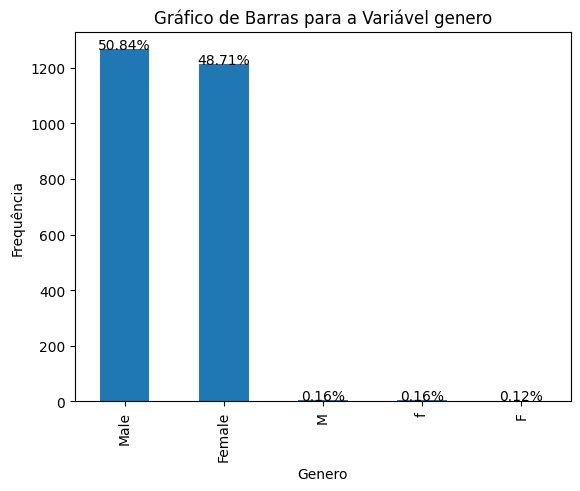

In [34]:
# Calculando as porcentagens
contagem = df['genero'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

# Adicionando pora procentagem nas barras
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável genero')
plt.xlabel('Genero')
plt.ylabel('Frequência')

plt.show()

Nós identificamos então que a variável 'Genero' tem um balanceamento de dados.

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


In [35]:
# BoxPlot da variavel total_pago
df_nao_zero = df[df['total_pago'] != 0]

fig = px.box(df_nao_zero, y='total_pago', title='Box Plot da total_pago (Valores Diferentes de Zero)', labels={'total_pago': 'Valores'})
fig.show()

In [36]:
#visualizando as ocorrencias onde total_pago > 8000
df[df['total_pago'] > 8500]

,customerID,genero,Idoso,Casado,Dependents,tempo_cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,pagamento_mensal,total_pago,churn
2175,8879-XUAHX,Male,0,Yes,No,71,1,Fiber optic,Yes,Yes,Yes,Two year,Electronic check,116.25,8564.75,0
2356,6650-BWFRT,Female,0,Yes,No,72,1,Fiber optic,Yes,Yes,Yes,Two year,Credit card (automatic),117.15,8529.50,0


In [37]:
print("Porcentagem de registros onde 'total_pago' > 8000:",
      (len(df[df['total_pago'] > 8000]) / len(df)) * 100)

Porcentagem de registros onde 'total_pago' > 8000: 1.2459807073954985


Melhor opção a ser feita é manter e analisar separadamente, pois os dados equivale a 1% do DataFrame.

In [38]:
# BoxPlot da variavel pagamento_mensal
df_nao_zero = df[df['pagamento_mensal'] != 0]

fig = px.box(df_nao_zero, y='pagamento_mensal', title='Box Plot da pagamento_mensal (Valores Diferentes de Zero)', labels={'pagamento_mensal': 'Valores'})
fig.show()

In [39]:
#visualizando as ocorrencias onde pagamento_mensal > 100
df[df['pagamento_mensal'] > 100]

,customerID,genero,Idoso,Casado,Dependents,tempo_cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,pagamento_mensal,total_pago,churn
296,3167-SNQPL,Male,1,Yes,Yes,38,0,Fiber optic,No,No,Yes,Month-to-month,Electronic check,101.15,3741.85,0
300,1557-EMYVT,Female,0,No,No,43,0,Fiber optic,Yes,Yes,Yes,Two year,Credit card (automatic),115.05,4895.10,0
303,5027-YOCXN,Male,0,Yes,Yes,51,0,Fiber optic,Yes,Yes,Yes,One year,Credit card (automatic),110.05,5686.40,0
313,4983-CLMLV,Female,0,Yes,No,52,0,Fiber optic,No,Yes,Yes,Month-to-month,Credit card (automatic),102.70,5138.10,0
324,6680-NENYN,Female,0,No,No,43,0,Fiber optic,No,No,Yes,Two year,Electronic check,104.60,4759.85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2439,3325-FUYCG,Male,0,Yes,Yes,28,1,Fiber optic,Yes,No,Yes,One year,Electronic check,106.10,2847.40,1
2446,7516-GMHUV,Male,1,Yes,No,50,1,Fiber optic,Yes,No,Yes,Two year,Credit card (automatic),105.05,5163.30,0
2462,5630-IXDXV,Female,0,No,No,47,1,Fiber optic,No,No,Yes,Month-to-month,Electronic check,106.35,4849.10,0
2471,7641-EUYET,Male,1,Yes,Yes,46,1,Fiber optic,Yes,No,Yes,Month-to-month,Electronic check,100.70,4541.20,1


In [40]:
print("Porcentagem de registros onde 'pagamento_mensal' > 100:",
      (len(df[df['pagamento_mensal'] > 100]) / len(df)) * 100)

Porcentagem de registros onde 'pagamento_mensal' > 100: 10.731511254019292


Melhor opção a ser feita é manter os dados, pois os dados equivale a 10% do DataFrame. A media equivale o dobro do valor do Upper fence porque deve ter serviços extras dentro do pacote onde aumentam o valor do pagamento mensal.

In [41]:
# BoxPlot da variavel tempo_cliente
df_nao_zero = df[df['tempo_cliente'] != 0]

fig = px.box(df_nao_zero, y='tempo_cliente', title='Box Plot da tempo_cliente (Valores Diferentes de Zero)', labels={'tempo_cliente': 'Valores'})
fig.show()

In [42]:
#visualizando as ocorrencias onde tempo_cliente > 70
df[df['tempo_cliente'] > 70]

,customerID,genero,Idoso,Casado,Dependents,tempo_cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,pagamento_mensal,total_pago,churn
5,9959-WOFKT,Male,0,No,Yes,71,1,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),65.607563,7382.25,0
16,5248-YGIJN,M,0,Yes,No,72,1,DSL,Yes,Yes,Yes,Two year,Credit card (automatic),65.607563,6369.45,0
18,3841-NFECX,Female,1,Yes,No,71,1,Fiber optic,Yes,Yes,No,Two year,Credit card (automatic),65.607563,6766.95,0
23,6234-RAAPL,Female,0,Yes,Yes,72,1,Fiber optic,Yes,Yes,Yes,Two year,Bank transfer (automatic),65.607563,7251.70,0
47,5954-BDFSG,Female,0,No,No,72,1,Fiber optic,No,Yes,Yes,Two year,Credit card (automatic),65.607563,7853.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,8231-BSWXX,Male,0,No,No,71,1,Fiber optic,No,No,No,One year,Credit card (automatic),79.050000,5552.50,0
2391,0310-SUCIN,Female,0,Yes,No,71,1,DSL,Yes,Yes,Yes,One year,Bank transfer (automatic),84.800000,6046.10,0
2431,9802-CAQUT,Female,0,Yes,Yes,72,1,Fiber optic,Yes,No,Yes,Two year,Credit card (automatic),109.550000,7887.25,0
2438,7602-MVRMB,Female,0,Yes,Yes,72,1,Fiber optic,Yes,Yes,Yes,Two year,Bank transfer (automatic),110.450000,8058.85,0


In [43]:
print("Porcentagem de registros onde 'tempo_cliente' > 70:",
      (len(df[df['tempo_cliente'] > 70]) / len(df)) * 100)


Porcentagem de registros onde 'tempo_cliente' > 70: 8.239549839228296


Melhor opção é manter os dados, pois o upper fence equivale a 72 e a media de 29, levando em consideração que é o tempo que o cliente tem, esses numeros acima não é comprometedor e sim necessario para a analise, esses numeros equivalem a 8% dos nossos dados.

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

In [44]:
df.head()

,customerID,genero,Idoso,Casado,Dependents,tempo_cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,pagamento_mensal,total_pago,churn
0,7590-VHVEG,Female,0,Yes,No,1,0,DSL,No,No,No,Month-to-month,Electronic check,29.850000,29.85,0
1,5575-GNVDE,Male,0,No,No,34,1,DSL,Yes,No,No,One year,Mailed check,56.950000,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,1,DSL,Yes,No,No,Month-to-month,Mailed check,53.850000,108.15,1
3,7795-CFOCW,Male,0,No,No,45,0,DSL,Yes,Yes,No,One year,Bank transfer (automatic),65.607563,1840.75,0
4,8191-XWSZG,F,0,No,No,52,1,No,No internet service,No internet service,No internet service,One year,Mailed check,65.607563,1022.95,0


**Insights from tempo_cliente plot:**
[Add your insights here]

**Insights from pagamento_mensal plot:**
[Add your insights here]

In [45]:
# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['churn', 'genero']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='churn', y='percent', color='genero', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Genero': 'Gênero'})

fig.update_layout(title='Relação entre Churn e Gênero',
                  yaxis_title='Porcentagem',
                  legend_title='Gênero')
fig.show()

Os homens tem uma proporção um pouco maior com 51% de não churn e as mulheres com 47% de não churn.

In [46]:
# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['churn', 'Casado']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='churn', y='percent', color='Casado', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Casado': 'Casado'})

fig.update_layout(title='Relação entre Churn e Casado',
                  yaxis_title='Porcentagem',
                  legend_title='Casado')
fig.show()

Clientes Casados são menos propicios a dar churn. Com média de 63% para não casados e 36% para os casados.

In [47]:
# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['churn', 'tempo_cliente']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='churn', y='percent', color='tempo_cliente', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'tempo_cliente': 'tempo_cliente'})

fig.update_layout(title='Relação entre Churn e Tempo_Cliente',
                  yaxis_title='Porcentagem',
                  legend_title='Tempo_Cliente')
fig.show()

Pode se analisar que clientes mais velhos não estão propicios a dar churn.

In [63]:
# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['churn', 'Tipo_Contrato']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='churn', y='percent', color='Tipo_Contrato', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Tipo_Contrato': 'Tipo_Contrato'})

fig.update_layout(title='Relação entre Churn e Tipo_Contrato',
                  yaxis_title='Porcentagem',
                  legend_title='Tipo_Contrato')
fig.show()

Clientes que possuem o plano mensal são os mais propicios a dar churn, com média de 90%.

In [71]:
# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['churn', 'total_pago']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='churn', y='percent', color='total_pago', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Tipo_Contrato': 'total_pago'})

fig.update_layout(title='Relação entre Churn e total_pago',
                  yaxis_title='Porcentagem',
                  legend_title='total_pago')
fig.show()

In [64]:
# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['churn', 'Idoso']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='churn', y='percent', color='Idoso', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Idoso': 'Idoso'})

fig.update_layout(title='Relação entre Churn e Idoso',
                  yaxis_title='Porcentagem',
                  legend_title='Idoso')
fig.show()

A maioria dos Idosos são não Churn, 75% dos clientes não idosos dão Churn.

**Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?**


*   Tipo_Contrato: Com essa variavel foi possivel analisar que Clientes que possuem o plano mensal são os mais propicios a dar churn, com média de 90%.
*   casado: Foi identificado que clientes casados são menos propicios a dar churn. Com média de 63% para não casados e 36% para os casados.
*   Idosos: Na analise a maioria dos Idosos são não Churn, 75% dos clientes não idosos dão Churn.
*   genero: por ultimo e não menos importante que as outras variaveis, foi possivel analisar que Os homens tem uma proporção um pouco maior com 51% de não churn e as mulheres com 47% de não churn.








